# CZ3004 MDP Algorithms

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [3]:
test1 = np.arange(400)
test1 = test1.reshape(20,20)

test1_mat = np.zeros_like(test1)
print(test1_mat)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [4]:
# Helper functions

def resetField(field):
  newField = np.zeros_like(field)
  for i in range(0, 20, 19):
    for j in range(0, 20):
      newField[i][j] = 2
  for i in range(0, 20):
    for j in range(0, 20, 19):
      newField[i][j] = 2
  return newField

def setObstacle(mat, y, x, direction):
  for i in range(-1, 2):
    for j in range(-1, 2):
      mat[y+i][x+j] = 2
  mat[y][x] = 1
  if direction == "North":
    mat[y-4][x] = 3
    node = Node(x, y-4)
  elif direction == "East":
    mat[y][x+4] = 3
    node = Node(x+4, y)
  elif direction == "South":
    mat[y+4][x] = 3
    node = Node(x, y+4)
  else:
    mat[y][x-4] = 3
    node = Node(x-4, y)
  goalNodes.append(node)

def setRobotLocation(mat, y, x):
  mat[y][x] = 4
  startNode = Node(x, y)

def printField(mat):
  f = plt.figure(figsize = (10 , 10))
  plt.imshow(mat)
  plt.xticks(np.arange(0, 20, 1))
  plt.yticks(np.arange(0, 20, 1))
  plt.show()

class Node:
  def __init__(self, x, y):
    self.x = x
    self.y = y

startNode = Node(0, 0)
goalNodes = []

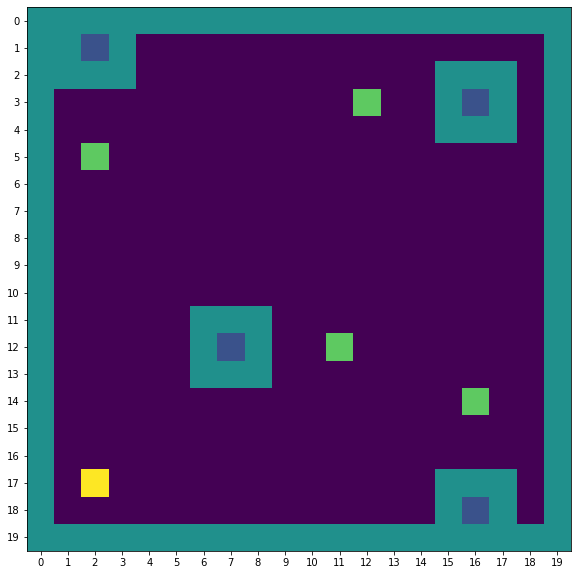

[<__main__.Node object at 0x00000200B49A9C10>, <__main__.Node object at 0x00000200B49A9AF0>, <__main__.Node object at 0x00000200B48CBE20>, <__main__.Node object at 0x00000200B48CBEE0>]
[<__main__.Node object at 0x00000200B3996B80>, <__main__.Node object at 0x00000200B49A9C10>, <__main__.Node object at 0x00000200B49A9AF0>, <__main__.Node object at 0x00000200B48CBE20>, <__main__.Node object at 0x00000200B48CBEE0>]


In [5]:
# Configure starting field
goalNodes = []
test1_mat = resetField(test1)

# b, a
setObstacle(test1_mat, 18, 16, "North")
setObstacle(test1_mat, 12, 7, "East")
setObstacle(test1_mat, 1, 2, "South")
setObstacle(test1_mat, 3, 16, "West")

setRobotLocation(test1_mat, 17, 2)

printField(test1_mat)

print(startNode)
print(goalNodes)
goalNodes.insert(0, startNode)
print(goalNodes)

In [6]:
def nearestNeighbour(goalNodes):
  v = goalNodes[0]
  visited = []
  for i in range(len(goalNodes)):
    visited.append(0)
  visited[0] = 1
  for i in range(len(goalNodes)-1):
    # find closest goal store in w (return index)
    # w = goalNodes[index]
    # visited[index] = 1
    # v = w
    print("Coordinate x: "+v.x+", y: "+v.y)